<a href="https://colab.research.google.com/github/maledias/reuters/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando o tópico de notícias

A ideia deste notebook é criar um modelo capaz de classificar as notícias disponíveis no _Reuters dataset_ em um tópico específico, dentro de 46 tópicos possíveis.

## Importando os dados e explorando os dados

In [10]:
from keras.datasets import reuters

# O argumento num_words carrega apenas as 10000 palavras mais comuns
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

São *8982* dados de treino e *2246* dados de teste.

In [11]:
print(f"Quantidade de dados de treino: {len(train_data)}.")

print(f"Quantidade de dados de teste: {len(test_data)}.")

Quantidade de dados de treino: 8982.
Quantidade de dados de teste: 2246.


Cada datapoint é uma lista de números inteiros, e cada inteiro representa uma palavra (dentro das 10000 mais utilizadas no dataset):

In [13]:
train_data[0][:10]

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207]

Podemos traduzir uma notícia para sua versão em inglês (lembrando que estamos mostrando apenas as 10000 palavras mais comuns): 

In [21]:
number_to_word = {index:word for word, index in reuters.get_word_index().items()}
def show_text_in_english(word_list):
    text = [number_to_word[n] for n in word_list]
    return " ".join(text)

In [22]:
show_text_in_english(train_data[0])

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

## Preprocessamento dos dados

In [24]:
import numpy as np

def vectorize_text(data, num_words=10000):
    vectorized_data = np.zeros((len(data), num_words))
    for i, word_list in enumerate(data):
        vectorized_data[i, word_list] = 1.
    return vectorized_data

In [25]:
train_data_vectorized = one_hot_encode_text(train_data)
test_data_vectorized = one_hot_encode_text(test_data)

In [26]:
def one_hot_encode_labels(data, num_labels=46):
    one_hot_encoded_labels = np.zeros((len(data), num_labels))
    for i, label in enumerate(data):
        one_hot_encoded_labels[i, label] = 1.
    return one_hot_encoded_labels

In [27]:
train_labels_one_hot = one_hot_encode_labels(train_labels)
test_labels_one_hot = one_hot_encode_labels(test_labels)

In [30]:
train_data_vectorized.shape, train_labels_one_hot.shape

((8982, 10000), (8982, 46))

## Definindo o modelo

In [31]:
import tensorflow as tf

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')                                
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)

## Treinando o modelo

In [54]:
X_val = train_data_vectorized[:1000]
X_train_partial = train_data_vectorized[1000:]
y_val = train_labels_one_hot[:1000]
y_train_partial = train_labels_one_hot[1000:]

In [55]:
history = model.fit(
    X_train_partial,
    y_train_partial,
    epochs=9,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 32ms/step - loss: 2.6069 - accuracy: 0.5343 - val_loss: 1.6948 - val_accuracy: 0.6570
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3656 - accuracy: 0.7112 - val_loss: 1.2724 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0210 - accuracy: 0.7764 - val_loss: 1.1308 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8095 - accuracy: 0.8295 - val_loss: 1.0135 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6483 - accuracy: 0.8653 - val_loss: 0.9492 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5135 - accuracy: 0.8951 - val_loss: 0.9146 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4103 - accuracy: 0.9139 - val_loss: 0.8823 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

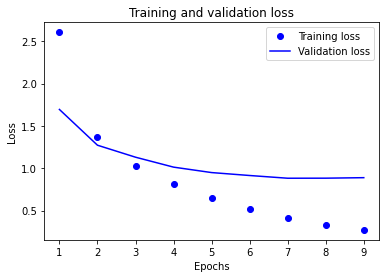

In [56]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

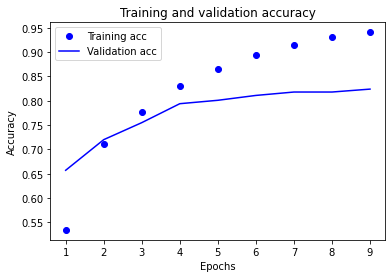

In [57]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()